In [4]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install scipy
!pip install imagecodecs
!pip3 install opencv-python
!pip install python-utils

  Using cached scikit_image-0.19.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
     |████████████████████████████████| 195 kB 6.9 MB/s            
  Using cached PyWavelets-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)
     |████████████████████████████████| 3.4 MB 43.5 MB/s            
     |████████████████████████████████| 2.0 MB 28.1 MB/s            
  Using cached imagecodecs-2022.2.22-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.1 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)


In [5]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import skimage.io as io

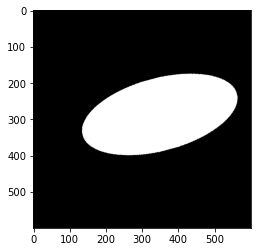

In [6]:
# création d'un truc ovale

image = np.zeros((600, 600))
rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1
image = rotate(image, angle=15, order=0)
label_img = label(image)
regions = regionprops(label_img)
plt.imshow(image, cmap=plt.cm.gray)

In [9]:
import pandas as pd

props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length'))
pd.DataFrame(props)

def dimensions(ovale) :
    label_img = label(ovale)
    regions = regionprops(label_img)
    props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length'))
    pd.DataFrame(props)
    tab = pd.DataFrame(props)
    print(tab)
    tab1=np.array(tab)
    longueur = tab1[0,3]
    largeur = tab1[0,4]
    print('longueur :', longueur)
    print('largeur :', largeur)
    return longueur, largeur

dimensions(image)

   centroid-0  centroid-1  orientation  axis_major_length  axis_minor_length
0  286.914167  348.412995    -1.308966         440.015503          199.91885
longueur : 440.0155029355615
largeur : 199.91885009157374


(440.0155029355615, 199.91885009157374)

     centroid-0  centroid-1  orientation  axis_major_length  axis_minor_length
0    236.065208  261.293488    -1.341344         586.061695         557.522432
1    129.800000    0.800000     0.785398           4.000000           1.385641
2    132.000000    6.000000     0.785398           0.000000           0.000000
3    133.500000    0.000000     0.000000           2.000000           0.000000
4    134.000000   12.000000     0.785398           0.000000           0.000000
..          ...         ...          ...                ...                ...
214  288.000000  270.000000     0.785398           0.000000           0.000000
215  289.000000  261.000000     0.785398           0.000000           0.000000
216  290.000000  254.000000     0.785398           0.000000           0.000000
217  292.000000  255.000000     0.785398           0.000000           0.000000
218  293.500000  266.500000     0.785398           2.000000           2.000000

[219 rows x 5 columns]
longueur : 586.0616948969384

(586.0616948969384, 557.5224319065866)

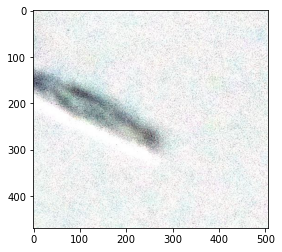

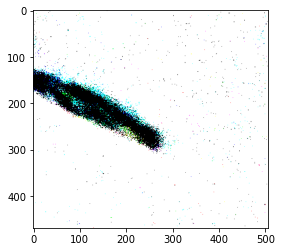

In [10]:
plancton = cv2.imread('./img_test2.jpg')
plt.imshow(plancton)

ret1,plancton=cv2.threshold(plancton,190,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(plancton)

dimensions(plancton[:,:,0]) # ça marche pas top 